# Successive halving
---------------------------------

This example shows how to compare multiple tree-based models using successive halving.

Import the boston dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#boston-dataset).
 This is a small and easy to train dataset whose goal is to predict house prices.

## Load the data

In [1]:
from sklearn.datasets import load_boston
from atom import ATOMRegressor

In [2]:
# Load the dataset's features and targets
X, y = load_boston(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMRegressor(X, y, verbose=2, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: regression.

Dataset stats ==================== >>
Shape: (506, 14)
Scaled: False
Outlier values: 82 (1.4%)
-------------------------------------
Train set size: 405
Test set size: 101



In [4]:
# We can compare tree-based models via successive halving
atom.successive_halving(
    models=["Tree", "Bag", "ET", "RF", "LGB", "CatB"],
    metric="mae",
    bagging=5,
)


Training ===================================== >>
Metric: neg_mean_absolute_error


Run: 0 ================================ >>
Models: Tree6, Bag6, ET6, RF6, LGB6, CatB6
Size of training set: 405 (17%)
Size of test set: 101


Results for Decision Tree:         
Fit ---------------------------------------------
Train evaluation --> neg_mean_absolute_error: -0.0
Test evaluation --> neg_mean_absolute_error: -3.3257
Time elapsed: 0.005s
Bagging -----------------------------------------
Evaluation --> neg_mean_absolute_error: -4.3307 ± 0.525
Time elapsed: 0.020s
-------------------------------------------------
Total time: 0.025s


Results for Bagging Regressor:         
Fit ---------------------------------------------
Train evaluation --> neg_mean_absolute_error: -1.3054
Test evaluation --> neg_mean_absolute_error: -2.695
Time elapsed: 0.019s
Bagging -----------------------------------------
Evaluation --> neg_mean_absolute_error: -3.0957 ± 0.2677
Time elapsed: 0.079s
-------------------

## Analyze results

In [5]:
# The results is now multi-index, where frac is the fraction
# of the training set used to fit the model. The model names
# end with the number of models fitted in that run
atom.results

metric_train  metric_test time_fit  mean_bagging  std_bagging  \
frac model                                                                  
0.17 Bag6  -1.305373e+00    -2.695050   0.019s     -3.095663     0.267668   
     CatB6 -8.055503e-02    -2.399073   1.240s     -2.919304     0.260378   
     ET6   -2.256238e-14    -2.154089   0.084s     -2.555434     0.170823   
     LGB6  -3.396511e+00    -4.487270   0.026s     -4.848536     0.267874   
     RF6   -1.150866e+00    -2.414297   0.109s     -2.957400     0.225311   
     Tree6 -0.000000e+00    -3.325743   0.005s     -4.330693     0.525026   
0.33 CatB3 -2.835499e-01    -2.420032   1.716s     -2.559497     0.276791   
     ET3   -2.315185e-14    -2.236079   0.097s     -2.601648     0.289034   
     RF3   -9.819778e-01    -2.505465   0.128s     -2.761887     0.194678   
1.00 CatB1 -3.977985e-01    -1.877590   3.207s     -2.051462     0.090227   

           time_bagging     time  
frac model                        
0.17 Bag6        0.079s   0.098s  
     CatB6       4.016s   5.257s  
     ET6         0.360s   0.444s  
     LGB6        0.068s   0.095s  
     RF6         0.496s   0.606s  
     Tree6       0.020s   0.025s  
0.33 CatB3       6.772s   8.489s  
     ET3         0.408s   0.505s  
     RF3         0.580s   0.708s  
1.00 CatB1      14.707s  17.916s

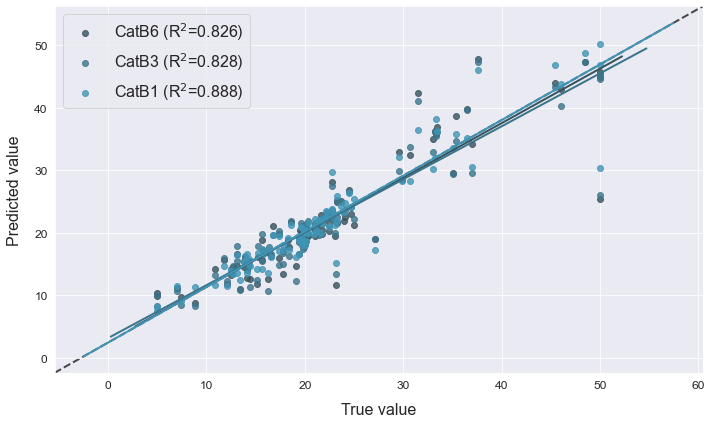

In [6]:
# You can use an acronym to call all the models from the same estimator
atom.plot_errors(models=["CatB"])

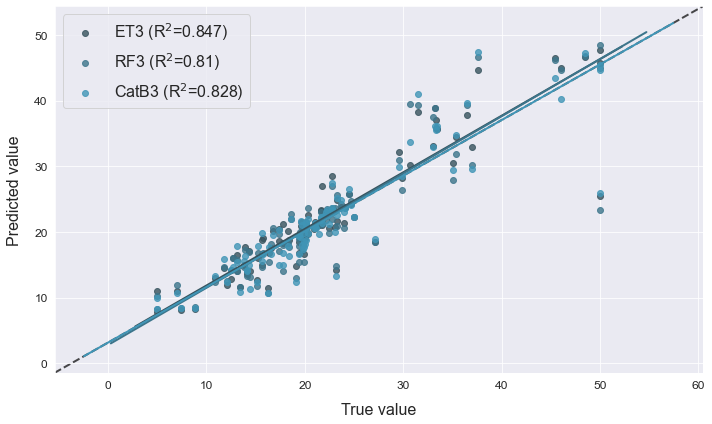

In [7]:
# Or use the number to call the numbers from the same run
atom.plot_errors(models=["3"])

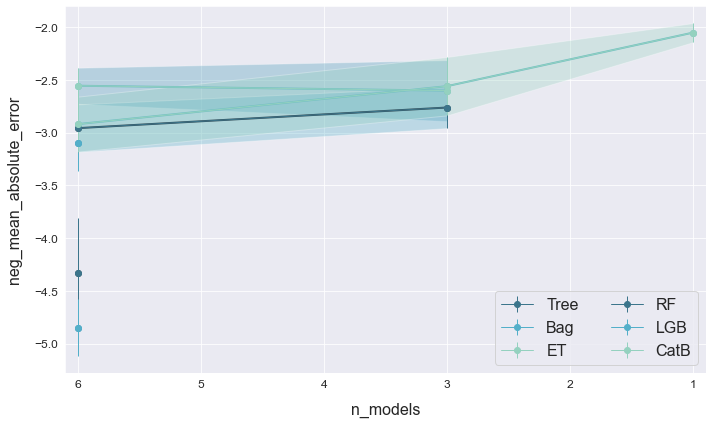

In [8]:
# Plot the successive halving's results
atom.plot_successive_halving()